<img src='img/fastcamp_h.png' height=100% width=100%>

# 10강. Dimensionality reduction (Autoencoder)

# 이번장에서 배우는 것들
* autoncoder
* convolutional autoencoder
* variational autoencoder

# 선형 연산의 단점

* pca는 강력한 차원 축소 알고리즘이지만 일반적인 경우 선형으로 동작함
* 이세상의 많은 데이터는 선형으로 풀리지 않는 문제가 많음
* 주어진 모든 사진을 선형 연산으로 좋은 화질로 압축 할 수 없음
* 다음 영상은 주어진 사람의 얼굴을 30개의 pc로 차원 축소한 사진의 예시임

<img src='img/10_01.png' height=100% width=100%>

# Autoencoder

* 딥러닝은 비선형 연산을 활성함수를 통하여 표현 가능
* 다음과 같은 구조가 있다면 어떨까?
* 딥러닝의 특징을 이용하여 사람의 개입이 없이 학습
* 파란 부분을 encoder라고 칭함
* 붉은 부분을 decoder라고 칭함

<img src='img/10_02.png' height=30% width=30%>

# Autoencoder의 구조

* 입력 tensor를 입력 보다 더 작은 차원으로 충분히 줄인 뒤 출력 차원을 입력 차원과 동일하게 맞춰주는 구조
* 입력 $x$와 출력 $\hat{x}$의 차이를 loss로 잡음 (mse or crossentropy)
* 중간 $z$부분에서 우리가 원하는 만큼의 차원으로 축소를 하는 구조


<img src='img/10_03.png' height=70% width=70%>

# Keras를 이용한 선형 autoencoder 구축

* mnist를 784 차원으로 축소한 뒤 이전 강좌의 pca처럼 선형 87차원으로 압축을 하여보자
* 해당 모델은 다음과 같은 구조로 구성됨

<img src='img/10_04.png' height=70% width=70%>

In [88]:
#pca 구하기
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) /255.
x_test = x_test.reshape((-1, 28 * 28)) /255.

In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(84, input_shape=(784,), activation='linear'))
model.add(Dense(784, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               66640     
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

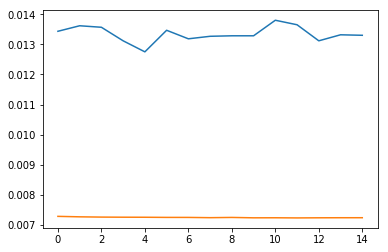

In [10]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

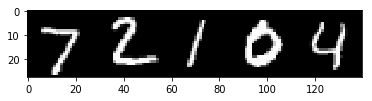

In [21]:
plt.imshow(np.hstack(x_test[:5].reshape((5, 28, 28))), cmap='gray')
plt.show()

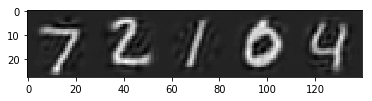

In [22]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# Keras를 이용한 비선형 shallow autoencoder 구축

* mnist를 784 차원으로 축소한 뒤 이전 강좌의 pca처럼 선형 87차원으로 압축을 하여보자
* 해당 모델은 다음과 같은 구조로 구성됨

<img src='img/10_04.png' height=70% width=70%>

In [24]:
model = Sequential()
model.add(Dense(84, input_shape=(784,), activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               66640     
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

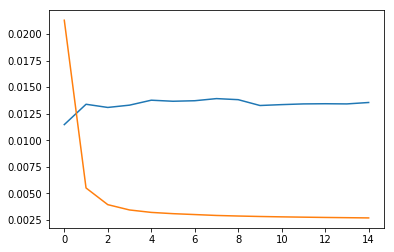

In [26]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

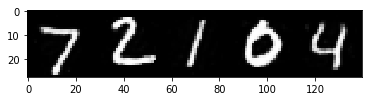

In [27]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# Keras를 이용한 비선형 2차원 shallow autoencoder 구축

* 해당 모델은 비선형이기 때문에 2차원으로 줄여도 압출이 더 잘될까?
* 2차원으로 줄이면 mnist 숫자 분포를 인간 눈에 시각화 할 수 있음
* 2차원까지 줄여보자
* 모델은 다음과 같음

<img src='img/10_05.png' height=70% width=70%>

In [29]:
model = Sequential()
model.add(Dense(2, input_shape=(784,), activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


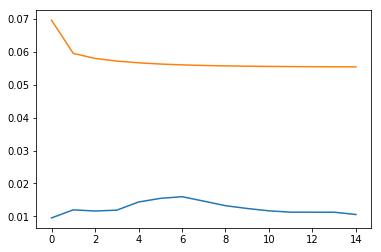

In [30]:
import matplotlib.pylab as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

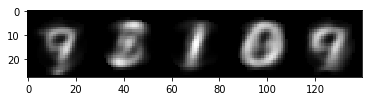

In [31]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# Keras를 이용한 비선형 2차원 deep autoencoder 구축

* sallow한 모델에서는 pca보다는 약간 나은것 같지만 2차원 z가 효율이 좋아보이지 않음을 확인
* hidden layer를 훨씬 더 깊게 두어 학습을 진행해보자
* 모델은 다음과 같음

<img src='img/10_06.png' height=70% width=70%>

In [72]:
from keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(784, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_56 (Batc (None, 64)                256       
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_57 (Batc (None, 32)                128       
_________________________________________________________________
dense_86 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_58 (Batc (None, 16)                64        
_________________________________________________________________
dense_87 (Dense)             (None, 8)                 136       
__________

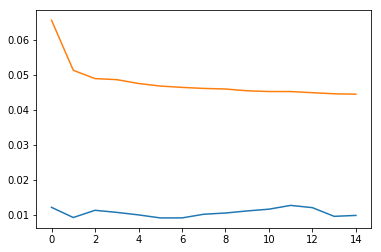

In [46]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

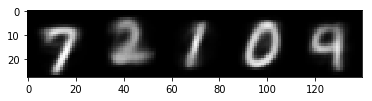

In [47]:
plt.imshow(np.hstack(model.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

# z (latent vector) 활용하기

### encoder
* 현재의 autoencoder는 입력 $x$을 넣으면 출력 $\hat{x}$가 나오지만 $z$ 출력을 이용 할 수는 없음
* 중간 z출력을 받는 모델을 encoder라고 칭함

### decoder
* 중간 z를 입력을 받아 $\hat{x}$를 출력하는 모델을 decoder라고 칭함

In [143]:
from keras.layers import Dense, BatchNormalization, Input

encoder_input = Input(shape=(784,))
layer1 = Dense(64, activation='relu')(encoder_input)
layer2 = BatchNormalization()(layer1)
layer3 = Dense(32, activation='relu')(layer2)
layer4 = BatchNormalization()(layer3)
layer5 = Dense(16, activation='relu')(layer4)
layer6 = BatchNormalization()(layer5)
layer7 = Dense(8, activation='relu')(layer6)
layer8 = BatchNormalization()(layer7)
layer9 = Dense(4, activation='relu')(layer8)
layer10 = BatchNormalization()(layer9)
layer11= Dense(2, activation='relu')(layer10)
layer_z = BatchNormalization()(layer11)
encoder = Model(inputs=encoder_input, outputs=layer_z)

decoder_input = Input(shape=(2,))
layer12 = Dense(4, activation='relu')(decoder_input)
layer13 = BatchNormalization()(layer12)
layer14 = Dense(8, activation='relu')(layer13)
layer15 = BatchNormalization()(layer14)
layer16 = Dense(16, activation='relu')(layer15)
layer17 = BatchNormalization()(layer16)
layer18= Dense(32, activation='relu')(layer17)
layer19 = BatchNormalization()(layer18)
layer20 = Dense(64, activation='relu')(layer19)
layer21 = BatchNormalization()(layer20)
layer22 = Dense(784, activation='sigmoid')(layer21)
decoder = Model(inputs=decoder_input, outputs=layer22)

ae_output = decoder(encoder(encoder_input))
ae = Model(encoder_input, ae_output)
ae.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [144]:
hist = ae.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)
ae.save_weights('./weights/ae.h5')

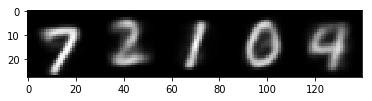

In [150]:
#autoencoder를 통하여 나온 2차원 데이터를 복원한 결과
#다소 흐릿하지만 이전보다 훨씬 높은 해상도로 어떤 숫자인지 알아볼 수 있음
plt.imshow(np.hstack(ae.predict(x_test[:5].reshape((5, 28*28))).reshape((5, 28, 28))), cmap='gray')
plt.show()

In [151]:
#mnist 데이터에 encoder를 통과 시키면 2차원 배열로 차원 축소됨
encoded = encoder.predict(x_test.reshape((-1, 28*28)))
print(encoded.shape)

(10000, 2)


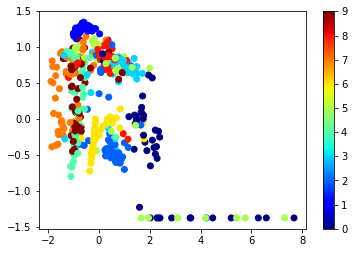

In [146]:
# 해당 2차원 배열을 시각화 하면 훨씬 더 높은 수준으로 시각화 할 수 있음
# 비슷한 데이터가 모여있음을 볼 수 있음
plt.scatter(x=encoded[:500,0], y=encoded[:500,1] , c=y_test[:500], cmap='jet')
plt.colorbar()
plt.show()

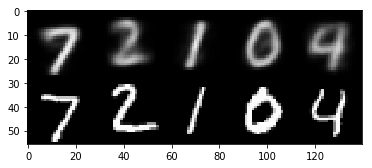

In [152]:
img1 = np.hstack(decoder.predict(encoded)[:5].reshape((5, 28, 28)))
img2 = np.hstack(x_test[:5].reshape((5, 28, 28)))
plt.imshow(np.vstack([img1, img2]) , cmap='gray')
plt.show()

# Convolutional Autoencoder의 구조

* 과거 mnist를 통하여 일반 fully connected network과 CNN의 차이를 배웠었음
* autoencoder에서도 같은 구조를 적용 할 수 있음


<img src='img/10_07.png' height=100% width=100%>

# Conv2D와 ConvTranspose2D

* Conv동작은 주어진 2차원 배열에서 kernel size와 stride, output channel에 맞게 연산을 하는 동작임
* 사전에 배운 것과 같이 padding을 하지 않으면 output height와 width가 점점 줄어들게 됨
* ConvTranspose 동작은 deconv라고도 쓰이며 (권장되지 않음) conv 동작을 역으로 하여 주어진 width와 height를 팽창 시키는 역할을 함


### Conv (파란 부분 입력, 초록부분 conv 동작후 output)
<img src='img/10_01.gif' height=30% width=30%>

### Conv Transpose (파란 부분 입력, 초록부분 conv transpose 동작후 output)
<img src='img/10_02.gif' height=30% width=30%>

In [243]:
from keras.layers import Dense, BatchNormalization, Input, Conv2D, Conv2DTranspose, Flatten, Reshape

cencoder_input = Input(shape=(28,28,1))
layer1 = Conv2D(32, (2,2), strides=2, activation='relu')(cencoder_input)
layer2 = BatchNormalization()(layer1)
layer3 = Conv2D(64, (2,2), strides=2, activation='relu')(layer2)
layer4 = BatchNormalization()(layer3)
layer5 = Conv2D(128, (2,2), strides=2, activation='relu')(layer4)
layer6 = BatchNormalization()(layer5)
layer7 = Flatten()(layer6)
layer_z = Dense(2, activation='relu')(layer7)
cencoder = Model(inputs=cencoder_input, outputs=layer_z)

cdecoder_input = Input(shape=(2,))
layer8 = Dense(1152, activation='relu')(cdecoder_input)
layer9 = BatchNormalization()(layer8)
layer10 = Reshape([3,3, 128])(layer9)
layer12 = Conv2DTranspose(64, (2,2), strides=2, output_padding=(1,1),activation='relu')(layer10)
layer13 = BatchNormalization()(layer12)
layer14= Conv2DTranspose(32, (2,2), strides=2, activation='relu')(layer13)
layer15 = BatchNormalization()(layer14)
layer16 = Conv2DTranspose(1, (2,2), strides=2, activation='sigmoid')(layer15)
cdecoder = Model(inputs=cdecoder_input, outputs=layer16)

cae_output = cdecoder(cencoder(cencoder_input))
cae = Model(cencoder_input, cae_output)
cae.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [244]:
cencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_94 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 14, 14, 32)        160       
_________________________________________________________________
batch_normalization_422 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 7, 7, 64)          8256      
_________________________________________________________________
batch_normalization_423 (Bat (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 3, 3, 128)         32896     
_________________________________________________________________
batch_normalization_424 (Bat (None, 3, 3, 128)         512       
__________

In [245]:
cdecoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_95 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_320 (Dense)            (None, 1152)              3456      
_________________________________________________________________
batch_normalization_425 (Bat (None, 1152)              4608      
_________________________________________________________________
reshape_31 (Reshape)         (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose_96 (Conv2DT (None, 7, 7, 64)          32832     
_________________________________________________________________
batch_normalization_426 (Bat (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_transpose_97 (Conv2DT (None, 14, 14, 32)        8224      
__________

In [246]:
cae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_94 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
model_119 (Model)            (None, 2)                 44514     
_________________________________________________________________
model_120 (Model)            (None, 28, 28, 1)         49633     
Total params: 94,147
Trainable params: 91,203
Non-trainable params: 2,944
_________________________________________________________________


In [247]:
#pca 구하기
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))/255.
x_test = x_test.reshape((-1, 28, 28, 1))/255.

In [248]:
hist = cae.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=15, verbose=0)

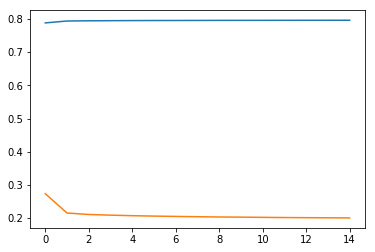

In [249]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

In [250]:
cae.save_weights('./weights/cae.h5')

In [251]:
#mnist 데이터에 encoder를 통과 시키면 2차원 배열로 차원 축소됨
encoded = cencoder.predict(x_test)
print(encoded.shape)

(10000, 2)


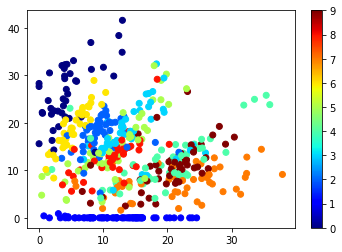

In [252]:
plt.scatter(x=encoded[:500,0], y=encoded[:500,1] , c=y_test[:500], cmap='jet')
plt.colorbar()
plt.show()

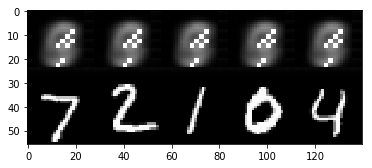

In [236]:
img1 = np.hstack(cdecoder.predict(encoded)[:5].reshape((5, 28, 28)))
img2 = np.hstack(x_test[:5].reshape((5, 28, 28)))
plt.imshow(np.vstack([img1, img2]) , cmap='gray')
plt.show()

In [206]:
from keras.layers import Dense, BatchNormalization, Input, Conv2D, Conv2DTranspose, Flatten, Reshape

cencoder_input = Input(shape=(28,28,1))
layer1 = Conv2D(32, (2,2), strides=2, padding='same', activation='relu')(cencoder_input)
layer2 = BatchNormalization()(layer1)
layer3 = Conv2D(64, (2,2), strides=2, padding='same', activation='relu')(layer2)
layer4 = BatchNormalization()(layer3)
layer5 = Conv2D(128, (2,2), strides=2, padding='same', activation='relu')(layer4)
layer6 = BatchNormalization()(layer5)
layer7 = Flatten()(layer6)
layer_z = Dense(2, activation='relu')(layer7)
cencoder = Model(inputs=cencoder_input, outputs=layer_z)

cdecoder_input = Input(shape=(2,))
layer8 = Dense(1152, activation='relu')(cdecoder_input)
layer9 = BatchNormalization()(layer8)
layer10 = Reshape([3,3, 128])(layer9)
layer12 = Conv2DTranspose(64, (2,2), strides=2, padding='same', output_padding=(1,1),activation='relu')(layer10)
layer13 = BatchNormalization()(layer12)
layer14= Conv2DTranspose(32, (2,2), strides=2, padding='same', activation='relu')(layer13)
layer15 = BatchNormalization()(layer14)
layer16 = Conv2DTranspose(1, (2,2), strides=2, padding='same', activation='relu')(layer15)
cdecoder = Model(inputs=cdecoder_input, outputs=layer16)

cae_output = cdecoder(cencoder(cencoder_input))
cae = Model(cencoder_input, cae_output)
cae.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [210]:
cencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_84 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 14, 14, 32)        160       
_________________________________________________________________
batch_normalization_394 (Bat (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 7, 7, 64)          8256      
_________________________________________________________________
batch_normalization_395 (Bat (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 4, 4, 128)         32896     
_________________________________________________________________
batch_normalization_396 (Bat (None, 4, 4, 128)         512       
__________

In [209]:
cdecoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_85 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_310 (Dense)            (None, 1152)              3456      
_________________________________________________________________
batch_normalization_397 (Bat (None, 1152)              4608      
_________________________________________________________________
reshape_26 (Reshape)         (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose_83 (Conv2DT (None, 5, 5, 64)          32832     
_________________________________________________________________
batch_normalization_398 (Bat (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_transpose_84 (Conv2DT (None, 10, 10, 32)        8224      
__________